# YOLO & DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/datasets/
!unzip -qq "/content/drive/MyDrive/datasets.zip"
%cd /content/

/content/datasets
/content


In [ ]:
#yolov5를 사용하기위한 요구사항 설치
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt 

import torch
import os
from IPython.display import Image, clear_output

%cd /content
# os.mkdir("datasets")

print(f"Setup complete. Using torch {torch.__version__}({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'cpu'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 12883, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 12883 (delta 22), reused 28 (delta 18), pack-reused 12844
Receiving objects: 100% (12883/12883), 13.00 MiB | 8.05 MiB/s, done.
Resolving deltas: 100% (8855/8855), done.
/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 40.0 MB/s 
/content
Setup complete. Using torch 1.12.1+cu113(Tesla T4)


In [ ]:
%cd /content
!curl -L "https://public.roboflow.com/ds/bnOxs1QJLb?key=MvWCiB671m" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

/content
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0   2738      0 --:--:-- --:--:-- --:--:--  2746
  0 6064M    0 4168k    0     0  6472k      0  0:15:59 --:--:--  0:15:59 6472k^C


#../

In [ ]:
import imgaug as ia
import imgaug.augmenters as iaa
import imageio
import json
import os
import cv2
import numpy as np
import os 
import json
import matplotlib.pylab as plt
import shutil
from PIL import Image
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
from os import listdir
from glob import glob


p = os.getcwd() 

In [ ]:
print(p)

/content


In [ ]:
a = glob('/content/datasets/train/labels/*')
print(a[1])
with open(a[0],'r') as f:
    read = f.readlines()
print(read[1][0])
f.close()

/content/datasets/train/labels/000000075451.txt
1


In [ ]:
def distribution(label,lst):
    with open(label,'r') as f:
        read = f.readlines()
        for i in range(len(read)):
            lst.append(read[i][0])
    return lst

def distribution2(lst,dic):
    for i in lst:
        try: dic[i] += 1
        except: dic[i] = 1
    fa = sorted(dic.items())
    return fa

In [ ]:
def grape(x,y):
    plt.bar(x,y)
    for k, v in enumerate(x):
        plt.text(v, y[k], y[k],                 
             fontsize = 9, 
             color='red',
             horizontalalignment='center',  
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)
    plt.show


In [ ]:
print(len(glob('/content/datasets/train/labels/*')))

27494


In [ ]:
train_label_txt = glob('/content/datasets/train/labels/*')
valid_label_txt = glob('/content/datasets/valid/labels/*')
print(len(train_label_txt), len(valid_label_txt))

20000 1185


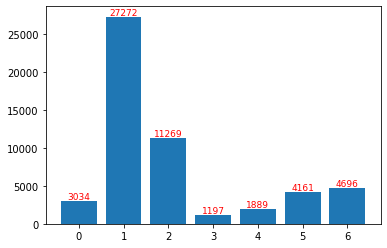

In [ ]:
#분포 train
d_train = []
d_train2 = {}

for i in range(len(train_label_txt)):
    distribution(train_label_txt[i],d_train)

trainx, trainy = zip(*distribution2(d_train,d_train2))

grape(trainx, trainy)


In [ ]:
from glob import glob

p = '/content/datasets/train/'
a = glob(p+'labels/*')
b = glob(p+'images/*')
print(len(a), '\n', len(b))
a.sort()
b.sort()
for i in range(20000, len(a)):
    os.remove(a[i])
    os.remove(b[i])
a = glob(p+'labels/*')
b = glob(p+'images/*')
print(len(a), '\n', len(b))

27494 
 27494
20000 
 20000


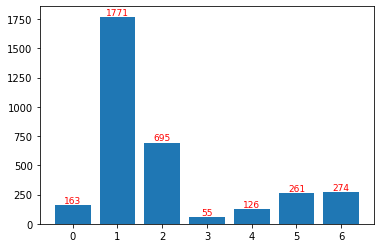

In [ ]:
#분포 valid
d_valid = []
d_valid2 = {}

for i in range(len(valid_label_txt)):
    distribution(valid_label_txt[i],d_valid)

validx, validy = zip(*distribution2(d_valid,d_valid2))

grape(validx, validy)


# Train

In [ ]:
%cd /content/yolov5/
!python train.py --img 640 --batch 24 --epochs 40 --data /content/datasets/data.yaml --weights yolov5l.pt --name /content/drive/MyDrive/swproject/last  --cache

/content/yolov5
train: weights=yolov5l.pt, cfg=, data=/content/datasets/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=40, batch_size=24, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=/content/drive/MyDrive/swproject/last, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 1 commit. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.2-172-gc4c0ee8 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, 

train : /content/datasets/train/images/
val : /content/datasets/valid/images/

nc : 7
names : ['bed', 'chair', 'diningtable', 'microwave', 'refrigerator', 'sofa', 'vase']

In [ ]:
%cd /content/yolov5/
!python train.py --resume /content/drive/MyDrive/swproject/last2/weights/last.pt 

/content/yolov5
train: weights=yolov5s.pt, cfg=, data=data/coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=640, rect=False, resume=/content/drive/MyDrive/swproject/last2/weights/last.pt, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-175-g1460e57 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, ob

In [ ]:
%cd /content/yolov5/
!python detect.py --source 0 --weights /content/drive/MyDrive/running/n5/weights/best.pt

# detect


In [ ]:
#yolov5를 사용하기위한 요구사항 설치
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt 

import torch
import os
from IPython.display import Image, clear_output

Cloning into 'yolov5'...
remote: Enumerating objects: 12169, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 12169 (delta 0), reused 2 (delta 0), pack-reused 12167
Receiving objects: 100% (12169/12169), 11.93 MiB | 14.11 MiB/s, done.
Resolving deltas: 100% (8427/8427), done.
/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 596 kB 4.2 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
%cd /content/yolov5
!python detect.py --source 'https://www.youtube.com/watch?v=1co1hlNS8cA' --weights /content/drive/MyDrive/running/sw10/weights/best.pt

#stream


In [ ]:
!pip install pafy
!pip install youtube_dl

     |████████████████████████████████| 1.9 MB 4.2 MB/s 


In [ ]:
import cv2 # opencv2 package for python.
import pafy# pafy allows us to read videos from youtube.
URL = "https://www.youtube.com/watch?v=F8DWn7vtKWQ&ab_channel=%ED%85%83%EB%B0%AD%EC%97%B0%EA%B5%AC%EC%86%8C" #URL to parse
play = pafy.new(URL).streams[-1] #'-1' means read the lowest quality of video.
assert play is not None # we want to make sure their is a input to read.
stream = cv2.VideoCapture(play.url) #create a opencv video stream.


ModuleNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#yolov5를 사용하기위한 요구사항 설치
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt 

import torch
import os
from IPython.display import Image, clear_output

Cloning into 'yolov5'...
remote: Enumerating objects: 12184, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12184 (delta 2), reused 3 (delta 1), pack-reused 12173
Receiving objects: 100% (12184/12184), 11.98 MiB | 28.86 MiB/s, done.
Resolving deltas: 100% (8430/8430), done.
/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 596 kB 7.2 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
%cd /content/yolov5
!python detect.py --source "/content/a.mp4" --weights /content/drive/MyDrive/running/swproject4/weights/best.pt --conf 0.5 --img 1660

/content/yolov5
detect: weights=['/content/drive/MyDrive/running/swproject4/weights/best.pt'], source=/content/a.mp4, data=data/coco128.yaml, imgsz=[1660, 1660], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-246-g2dd3db0 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 290 layers, 20881221 parameters, 0 gradients, 48.0 GFLOPs
video 1/1 (1/2052) /content/a.mp4: 704x1664 Done. (0.028s)
video 1/1 (2/2052) /content/a.mp4: 704x1664 Done. (0.026s)
video 1/1 (3/2052) /content/a.mp4: 704x1664 Done. (0.026s)
video 1/1 (4/2052) /content/a.mp4: 704x1664 Done. (0.026s)
video 1/1 (5/2052) /content/a.mp4: 704x1664 Done. (0.026s)
video 1/1 (6/

In [ ]:
import torch
import os
from IPython.display import Image, clear_output

from google.colab.patches import cv2_imshow

!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt 

%cd /content/yolov5
!python detect.py --source "/content/(506) 호박흰가루병 흰가루병이야기 호박잘키우기 하우스와노지의차이 - YouTube 외 페이지 4개 - 개인 - Microsoft​ Edge 2022-06-07 21-44-29.mp4" --weights /content/drive/MyDrive/running/swproject4/weights/best.pt --conf 0.5 --img 1080 --device cuda device